## Recursive Autoregressive Forecasting using Skforecast for Time Series Forecasting in Scikit-Learn

To apply machine learning models, time series data has to be transformed into a matrix in which each value is related to the time window (lags) that precedes it.
A lag with respect to a time step $t$  is the values of the series at previous time steps, e.g., lag 1 is the value at time step t-1.

Once data is in matrix form, any regression model can be trained to predict the next value (step) of the series. 
During model training, every row is considered a separate data instance, where values at lags 1, 2, ...  p  are considered predictors for the target quantity of the time series at time step  p+1 .

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
# Modelling and forecasting
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

In [4]:
#Forecasting using SCikit Learn

covid_df = pd.read_csv("covidHost_df_DateInd.csv")
covid_df.info()
covid_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18216 non-null  object 
 1   Region                      18216 non-null  object 
 2   Total Cases                 18216 non-null  float64
 3   Active Cases                18216 non-null  int64  
 4   Inpatient Hospitalizations  18216 non-null  float64
 5   ICU Hospitalizations        18216 non-null  float64
 6   Recovered Cases             18216 non-null  float64
 7   Deaths                      18216 non-null  float64
 8   New Cases                   18216 non-null  int64  
 9   Age 4 and Under             18216 non-null  float64
 10  Age 5 to 11                 18216 non-null  float64
 11  Age 12 to 19                18216 non-null  float64
 12  Age 20 to 39                18216 non-null  float64
 13  Ages 40 to 59               182

,Date,Region,Total Cases,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases,Age 4 and Under,Age 5 to 11,Age 12 to 19,Age 20 to 39,Ages 40 to 59,Age 60 to 79,Age 80+
18211,2022/02/06,South East,8191.0,142,14.0,0.0,7415.0,84.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18212,2022/02/06,South East,0.0,160,0.0,0.0,0.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18213,2022/02/06,South East,0.0,182,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18214,2022/02/06,South East,0.0,208,0.0,0.0,0.0,0.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18215,2022/02/06,Total,123258.0,9223,301.0,31.0,113023.0,1012.0,724,6734.0,12229.0,14297.0,44786.0,29868.0,11745.0,3599.0


In [5]:
#To make the date column to be parsed as a date field
parse_dates=covid_df['Date']
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        18216 non-null  object 
 1   Region                      18216 non-null  object 
 2   Total Cases                 18216 non-null  float64
 3   Active Cases                18216 non-null  int64  
 4   Inpatient Hospitalizations  18216 non-null  float64
 5   ICU Hospitalizations        18216 non-null  float64
 6   Recovered Cases             18216 non-null  float64
 7   Deaths                      18216 non-null  float64
 8   New Cases                   18216 non-null  int64  
 9   Age 4 and Under             18216 non-null  float64
 10  Age 5 to 11                 18216 non-null  float64
 11  Age 12 to 19                18216 non-null  float64
 12  Age 20 to 39                18216 non-null  float64
 13  Ages 40 to 59               182

In [6]:
#Converting date column to datetime format
covid_df["Date"] = pd.to_datetime(covid_df['Date'], format='%Y.%m.%d')
#covid_df.asfreq(freq='D', fill_value=0)
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        18216 non-null  datetime64[ns]
 1   Region                      18216 non-null  object        
 2   Total Cases                 18216 non-null  float64       
 3   Active Cases                18216 non-null  int64         
 4   Inpatient Hospitalizations  18216 non-null  float64       
 5   ICU Hospitalizations        18216 non-null  float64       
 6   Recovered Cases             18216 non-null  float64       
 7   Deaths                      18216 non-null  float64       
 8   New Cases                   18216 non-null  int64         
 9   Age 4 and Under             18216 non-null  float64       
 10  Age 5 to 11                 18216 non-null  float64       
 11  Age 12 to 19                18216 non-null  float64   

In [7]:
covid_df.head()

,Date,Region,Total Cases,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases,Age 4 and Under,Age 5 to 11,Age 12 to 19,Age 20 to 39,Ages 40 to 59,Age 60 to 79,Age 80+
0,2020-08-04,Far North West,346.0,4,0.0,0.0,335.0,7.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-08-04,Far North West,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-04,Far North Central,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-08-04,Far North East,6.0,0,0.0,0.0,6.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-08-04,Far North East,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
date_time = covid_df["Date"]

## Plotting the evolution of covid cases over time

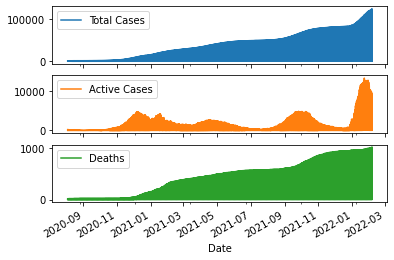

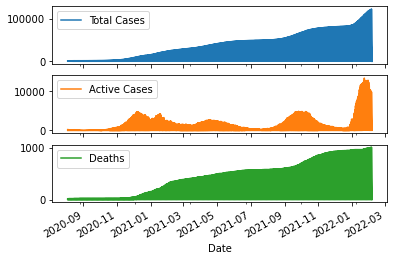

In [9]:
plot_cols = ['Total Cases', 'Active Cases', 'Deaths']
plot_features = covid_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = covid_df[plot_cols][:18215]
plot_features.index = date_time[:18215]
_ = plot_features.plot(subplots=True)

## Evaluating the statistics of the dataset

In [10]:
#https://www.tensorflow.org/tutorials/structured_data/time_series

In [11]:
covid_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Cases,18216.0,2515.134387,9299.735599,0.0,0.0,0.0,1308.25,123258.0
Active Cases,18216.0,135.765975,616.291359,0.0,5.0,21.0,63.00,13290.0
Inpatient Hospitalizations,18216.0,6.432916,24.349241,0.0,0.0,0.0,1.00,347.0
ICU Hospitalizations,18216.0,1.541612,6.201487,0.0,0.0,0.0,0.00,85.0
Recovered Cases,18216.0,2351.559892,8742.671891,0.0,0.0,0.0,1143.25,113023.0
Deaths,18216.0,27.783762,100.298186,0.0,0.0,0.0,11.00,1012.0
New Cases,18216.0,12.767567,62.609119,0.0,0.0,1.0,6.00,1638.0
Age 4 and Under,18216.0,20.519433,334.801027,0.0,0.0,0.0,0.00,6734.0
Age 5 to 11,18216.0,37.759442,616.247804,0.0,0.0,0.0,0.00,12229.0
Age 12 to 19,18216.0,64.743303,827.822913,0.0,0.0,0.0,0.00,14297.0


In [12]:
#https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

In [13]:
#Data preparation
covid_df = covid_df.set_index('Date')

In [14]:
## Grouping cases by region
covid_df_groupReg = covid_df.groupby(["Date", "Region"])[["Active Cases", "Inpatient Hospitalizations", "ICU Hospitalizations", "Recovered Cases", "Deaths", "New Cases"]].sum().reset_index()
covid_df_groupReg.tail()
#covidHost_df_groupReg.info()  #14 provinces/regions

#deleting the last row with totals
covid_df_groupReg.drop(covid_df_groupReg.tail(1).index, inplace=True)
covid_df_groupReg.tail()

,Date,Region,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases
7722,2022-02-06,Regina,2113,49.0,5.0,23925.0,219.0,122
7723,2022-02-06,Saskatoon,2485,154.0,17.0,29440.0,190.0,207
7724,2022-02-06,South Central,559,1.0,1.0,4463.0,45.0,67
7725,2022-02-06,South East,692,14.0,0.0,7415.0,84.0,44
7726,2022-02-06,South West,265,6.0,0.0,3100.0,40.0,23


In [15]:
#sorting rows by region
covid_df_groupReg.sort_values(by="Region", ascending=True)

#droping the rows containing totals
covid_df_groupReg.drop(covid_df_groupReg.index[covid_df_groupReg["Region"] == "Total"], inplace = True)

In [16]:
covid_df_groupReg.tail()
covid_df_groupReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7176 entries, 0 to 7726
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        7176 non-null   datetime64[ns]
 1   Region                      7176 non-null   object        
 2   Active Cases                7176 non-null   int64         
 3   Inpatient Hospitalizations  7176 non-null   float64       
 4   ICU Hospitalizations        7176 non-null   float64       
 5   Recovered Cases             7176 non-null   float64       
 6   Deaths                      7176 non-null   float64       
 7   New Cases                   7176 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 504.6+ KB


In [17]:
number_regions = covid_df_groupReg["Region"].unique()
print("There are ", str(len(number_regions)), " regions")

There are  13  regions


## Filtering out data by province and creating a separate dataframe for each

1. Central East

In [18]:
#Filtering out data by province and creating a separate dataframe for each

#0          Central East
#1          Central West
#2     Far North Central
#3        Far North East
#4        Far North West
#5         North Central
#6            North East
#7            North West
#8                Regina
#9             Saskatoon
#10        South Central
#11           South East
#12           South West

covid_df_CentraEast = covid_df_groupReg[covid_df_groupReg["Region"] == "Central East"]
covid_df_CentraEast.info()
covid_df_CentraEast.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 0 to 7714
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        552 non-null    datetime64[ns]
 1   Region                      552 non-null    object        
 2   Active Cases                552 non-null    int64         
 3   Inpatient Hospitalizations  552 non-null    float64       
 4   ICU Hospitalizations        552 non-null    float64       
 5   Recovered Cases             552 non-null    float64       
 6   Deaths                      552 non-null    float64       
 7   New Cases                   552 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 38.8+ KB


,Date,Region,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases
0,2020-08-04,Central East,3,0.0,0.0,24.0,1.0,0
14,2020-08-05,Central East,3,1.0,0.0,24.0,1.0,0
28,2020-08-06,Central East,3,1.0,0.0,24.0,1.0,0
42,2020-08-07,Central East,5,1.0,0.0,24.0,1.0,2
56,2020-08-08,Central East,3,0.0,0.0,26.0,1.0,0


In [19]:
#resetting the index
covid_df_CentraEast.reset_index(drop=True)

#set the index to be the date column
covid_df_CentraEast_DateInd = covid_df_CentraEast.set_index("Date")
covid_df_CentraEast_DateInd

,Region,Active Cases,Inpatient Hospitalizations,ICU Hospitalizations,Recovered Cases,Deaths,New Cases
Date,,,,,,,
2020-08-04,Central East,3,0.0,0.0,24.0,1.0,0
2020-08-05,Central East,3,1.0,0.0,24.0,1.0,0
2020-08-06,Central East,3,1.0,0.0,24.0,1.0,0
2020-08-07,Central East,5,1.0,0.0,24.0,1.0,2
2020-08-08,Central East,3,0.0,0.0,26.0,1.0,0
...,...,...,...,...,...,...,...
2022-02-02,Central East,780,12.0,4.0,6631.0,67.0,46
2022-02-03,Central East,791,19.0,3.0,6703.0,70.0,69
2022-02-04,Central East,758,17.0,2.0,6773.0,71.0,32


In [20]:
#Inpatient ICU Hospitalizations (CentralEast)
covid_df_CentraEast_DateInd_ICU = covid_df_CentraEast_DateInd.iloc[: , 4:5]
#covid_df_CentraEast_DateInd_ICU.tail()
covid_df_CentraEast_DateInd_ICU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 552 entries, 2020-08-04 to 2022-02-06
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recovered Cases  552 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [21]:
#adding a new index in order to rename column
covid_df_CentraEast_DateInd_ICU = covid_df_CentraEast_DateInd_ICU.reset_index()
print(covid_df_CentraEast_DateInd_ICU.head())

        Date  Recovered Cases
0 2020-08-04             24.0
1 2020-08-05             24.0
2 2020-08-06             24.0
3 2020-08-07             24.0
4 2020-08-08             26.0


In [22]:
#Data preparation
covid_df_CE_Inpatient = covid_df_CentraEast_DateInd_ICU.rename({'Date': 'x', 'Recovered Cases':'y'}, axis='columns')
#covid_df_CE_Inpatient = covid_df_CE_Inpatient.asfreq('D')
#covid_df_CE_Inpatient = covid_df_CE_Inpatient.sort_index()
covid_df_CE_Inpatient.head()

#set the index to be the date column
covid_df_CE_Inpatient = covid_df_CE_Inpatient.set_index("x")
covid_df_CE_Inpatient

,y
x,
2020-08-04,24.0
2020-08-05,24.0
2020-08-06,24.0
2020-08-07,24.0
2020-08-08,26.0
...,...
2022-02-02,6631.0
2022-02-03,6703.0
2022-02-04,6773.0


In [23]:
#checking number of missing values
covid_df_CE_Inpatient.isnull().any(axis=1).mean()

0.0

In [24]:
# Verify that a temporary index is complete
# ==============================================================================
(covid_df_CE_Inpatient.index == pd.date_range(start=covid_df_CE_Inpatient.index.min(),
                             end=covid_df_CE_Inpatient.index.max(),
                             freq=covid_df_CE_Inpatient.index.freq)).all()

True

In [25]:
number_regions

array(['Central East', 'Central West', 'Far North Central',
       'Far North East', 'Far North West', 'North Central', 'North East',
       'North West', 'Regina', 'Saskatoon', 'South Central', 'South East',
       'South West'], dtype=object)

In [26]:
for i in number_regions:
    print(i)

Central East
Central West
Far North Central
Far North East
Far North West
North Central
North East
North West
Regina
Saskatoon
South Central
South East
South West


## Splitting Data into Training and Test Data

Train dates : 2020-08-04 00:00:00 --- 2021-10-19 00:00:00  (n=442)
Test dates  : 2021-10-20 00:00:00 --- 2022-02-06 00:00:00  (n=110)


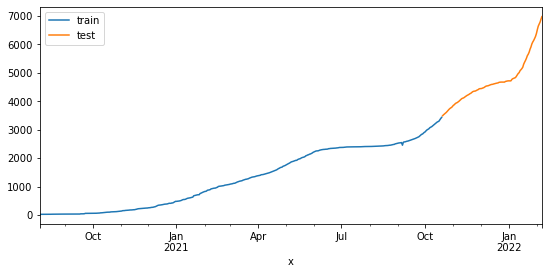

In [27]:
#Using the 80-20 training-test split of the 552 days. Therefore, the last 110 days are used to evaluate or test the model, while first 442 are for training.
#552*0.2=110.4

# Split data into train-test
# ==============================================================================
steps = 110                    #no. of future steps predicted.
data_train = covid_df_CE_Inpatient[:-steps]
data_test  = covid_df_CE_Inpatient[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

#Plotting the training data and test data out of the entire data for the Central East Region
fig, ax=plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
ax.legend();

## Creating and Training the Forecasting Model

In [28]:
len(data_train)
data_train['y']
#data_train.head()

x
2020-08-04      24.0
2020-08-05      24.0
2020-08-06      24.0
2020-08-07      24.0
2020-08-08      26.0
               ...  
2021-10-15    3277.0
2021-10-16    3294.0
2021-10-17    3344.0
2021-10-18    3388.0
2021-10-19    3428.0
Name: y, Length: 442, dtype: float64

In [29]:
len(data_test)

110

In [30]:
#The ForecasterAutoreg class, a model is created and trained from a RandomForestRegressor regressor with a time window of 442--441 lags (because it has to be less than 442). 
#The model uses the previous 110 days as predictors.

## Create and train forecaster using the datetime index

In [31]:
# Create and train forecaster using the datetime index.
#Here, we use the Random Forest model with default hyperparameters and a lag of 441.

forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 110  #using the previous 110 days in the training data as predictors
             )

forecaster.fit(y=data_train['y'])
forecaster

C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110] 
Transformer for y: None 
Transformer for exog: None 
Window size: 110 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 441] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_lea

## Prediction using the datetime index

In [32]:
#Making predictions 110 days into the future, using the trained model.

steps = 110
predictions = forecaster.predict(steps=steps)
predictions.head(111)

C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


110    3399.18
111    3397.00
112    3398.34
113    3400.59
114    3402.37
        ...   
215    3404.44
216    3404.44
217    3404.44
218    3404.44
219    3404.44
Name: pred, Length: 110, dtype: float64

## Training without the datetime index

In [33]:
#Training without the datetime index
forecaster.fit(y=data_train['y'])
forecaster.predict(steps=110)

C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


110    3399.18
111    3397.00
112    3398.34
113    3400.59
114    3402.37
        ...   
215    3404.44
216    3404.44
217    3404.44
218    3404.44
219    3404.44
Name: pred, Length: 110, dtype: float64

In [34]:
#Adding a date index to the predicted values

#Train dates : 2020-08-04 00:00:00 --- 2021-10-19 00:00:00  (n=442)
#Test dates  : 2021-10-20 00:00:00 --- 2022-02-06 00:00:00  (n=110)
                                                            
#convert series to dataframe
df = predictions.to_frame(name='predicted_y')
df

index = pd.date_range('2021-10-20', periods=110, freq='D')
df['x']=index
df.head()

#set the index to be the x column
predicted_df = df.set_index("x")
predicted_df

,predicted_y
x,
2021-10-20,3399.18
2021-10-21,3397.00
2021-10-22,3398.34
2021-10-23,3400.59
2021-10-24,3402.37
...,...
2022-02-02,3404.44
2022-02-03,3404.44
2022-02-04,3404.44


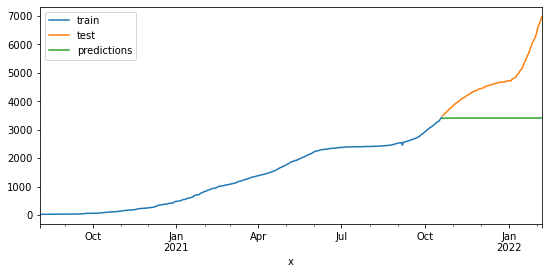

In [35]:
#Plotting the actual data for the first 442 days and the actual vs predicted for the remaining 110 days
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predicted_df['predicted_y'].plot(ax=ax, label='predictions')
ax.legend();

In [36]:
#url:https://joaquinamatrodrigo.github.io/skforecast/0.4.3/notebooks/input-data.html

## Quantifying the error made in the prediction

In [37]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predicted_df['predicted_y']
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 2328265.7647318183


## Tuning the Hyperparameter

#### Finding the best combination of lags and hyperparameters using the the grid_search_forecaster function in the Skforecast library.

In [38]:
#Searching for the optimal lag and hyperparameter combination.

steps =  110 #no.of future steps predicted.
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 110 # values predicted into the future, i.e., forecasting 110 days into the future. This value will be replaced in the grid search.
             )

# Lags used as predictors
lags_grid = [1, 110]

# Regressor's hyperparameters
param_grid = {'n_estimators': [10, 50],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


loop param_grid:   0%|                                              | 0/6 [00:00<?, ?it/s]C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has Datet

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'max_depth': 10, 'n_estimators': 10}
  Backtesting metric: 343345.96262443444




C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


## Final Model

#### Training the model using the optimal configuration obtained above using the grid_search_forecaster function.

In [39]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 1
             )

forecaster.fit(y=data_train['y'])

C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [40]:
# Predictions
# ==============================================================================
predictions1 = forecaster.predict(steps=steps)
predictions1

C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


1      3403.6
2      3403.6
3      3403.6
4      3403.6
5      3403.6
        ...  
106    3403.6
107    3403.6
108    3403.6
109    3403.6
110    3403.6
Name: pred, Length: 110, dtype: float64

In [41]:
#convert series to dataframe
df1 = predictions1.to_frame(name='predicted_y')
df1


#Train dates : 2020-08-04 00:00:00 --- 2021-10-19 00:00:00  (n=442)
#Test dates  : 2021-10-20 00:00:00 --- 2022-02-06 00:00:00  (n=110)

index1 = pd.date_range('2021-10-20', periods=110, freq='D')
#print(len(df1), ", ", len(index1))

df1['x']=index1
df1.head()

#set the index to be the x column
predicted_df1 = df1.set_index("x")
predicted_df1

,predicted_y
x,
2021-10-20,3403.6
2021-10-21,3403.6
2021-10-22,3403.6
2021-10-23,3403.6
2021-10-24,3403.6
...,...
2022-02-02,3403.6
2022-02-03,3403.6
2022-02-04,3403.6


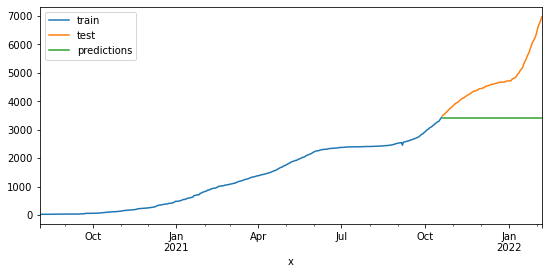

In [42]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['y'].plot(ax=ax, label='train')
data_test['y'].plot(ax=ax, label='test')
predicted_df1['predicted_y'].plot(ax=ax, label='predictions')
ax.legend();

### Measuring the Error Rate

In [43]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['y'],
                y_pred = predicted_df1['predicted_y']
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 2330318.5836363644


In [44]:
# Backtesting
# Backtesting
# ==============================================================================
steps = 441
n_backtesting = 10

metric, predictions_backtest = backtesting_forecaster(
                                    forecaster         = forecaster,
                                    y                  = data_test['y'],
                                    initial_train_size = len(data_test) - n_backtesting,
                                    fixed_train_size   = False,
                                    steps              = steps,
                                    metric             = 'mean_squared_error',
                                    refit              = True,
                                    verbose            = True
                                )

print(f"Backtest error: {metric}")

Information of backtesting process
----------------------------------
Number of observations used for initial training: 100
Number of observations used for backtesting: 10
    Number of folds: 1
    Number of steps per fold: 441
    Last fold only includes 10 observations.

Data partition in fold: 0
    Training:   2021-10-20 00:00:00 -- 2022-01-27 00:00:00  (n=100)
    Validation: 2022-01-28 00:00:00 -- 2022-02-06 00:00:00  (n=10)

Backtest error: 314202.99999999965


C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:360: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\skforecast\utils\utils.py:417: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
